# Import Libraries and Dataset

In [ ]:
!pip install joypy

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import joypy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# About Dataset

The data which is from Kaggle website, was collected and made available by “National Institute of Diabetes and Digestive and Kidney Diseases” as part of the Pima Indians Diabetes Database. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here belong to the Pima Indian heritage (subgroup of Native Americans), and are females of ages 21 and above.

In [ ]:
path = 'drive/MyDrive/ReDi/diabetes2.csv'
df = pd.read_csv(path)
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [ ]:
print("Number of 0 s for Glucose:", df['Glucose'].isin([0]).sum())
print("Number of 0 s for Blood Pressure:", df['BloodPressure'].isin([0]).sum())
print("Number of 0 s for Skin Thickness:", df['SkinThickness'].isin([0]).sum())
print("Number of 0 s for Insulin:", df['Insulin'].isin([0]).sum())
print("Number of 0 s for BMI:", df['BMI'].isin([0]).sum())

Number of 0 s for Glucose: 5
Number of 0 s for Blood Pressure: 35
Number of 0 s for Skin Thickness: 227
Number of 0 s for Insulin: 374
Number of 0 s for BMI: 11


In [ ]:
glucose = (df['Glucose'].isin([0]).sum() / len(df)) * 100
print("Percentage of missing data for Glocuse: %.2f" % glucose)

bloodpressure = (df['BloodPressure'].isin([0]).sum() / len(df)) * 100
print("Percentage of missing data for Blood Pressure: %.2f" % bloodpressure)

skinthickness = (df['SkinThickness'].isin([0]).sum() / len(df)) * 100
print("Percentage of missing data for Skin Thickness: %.2f" % skinthickness)

insulin = (df['Insulin'].isin([0]).sum() / len(df)) * 100
print("Percentage of missing data for Insulin: %.2f" % insulin)

bmi = (df['BMI'].isin([0]).sum() / len(df)) * 100
print("Percentage of missing data for BMI: %.2f" % bmi)


# We can see we are missing between 0.65%-48.6% of data for these variables, even though the isnull function showed us no missing data as NaN.

Percentage of missing data for Glocuse: 0.65
Percentage of missing data for Blood Pressure: 4.56
Percentage of missing data for Skin Thickness: 29.56
Percentage of missing data for Insulin: 48.70
Percentage of missing data for BMI: 1.43


# Data Cleaning

In [ ]:
df_clean = df.copy()

In [ ]:
# Identify duplicate rows based on all columns
duplicate_rows = df_clean.duplicated()

# Remove duplicate rows
df_clean = df_clean[~duplicate_rows]

In [ ]:
# Replacing 0 values in these columns with mean
df_clean['Glucose'] = df_clean['Glucose'].replace(0,df['Glucose'].mean())
df_clean['BloodPressure'] = df_clean['BloodPressure'].replace(0,df['BloodPressure'].mean())
df_clean['SkinThickness'] = df_clean['SkinThickness'].replace(0,df['SkinThickness'].mean())
df_clean['Insulin'] = df_clean['Insulin'].replace(0,df['Insulin'].mean())
df_clean['BMI'] = df_clean['BMI'].replace(0,df['BMI'].mean())
df_clean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [ ]:
print("Number of 0 s for Glucose:", df_clean['Glucose'].isin([0]).sum())
print("Number of 0 s for Blood Pressure:", df_clean['BloodPressure'].isin([0]).sum())
print("Number of 0 s for Skin Thickness:", df_clean['SkinThickness'].isin([0]).sum())
print("Number of 0 s for Insulin:", df_clean['Insulin'].isin([0]).sum())
print("Number of 0 s for BMI:", df_clean['BMI'].isin([0]).sum())

Number of 0 s for Glucose: 0
Number of 0 s for Blood Pressure: 0
Number of 0 s for Skin Thickness: 0
Number of 0 s for Insulin: 0
Number of 0 s for BMI: 0


In [ ]:
df_clean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df_clean['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Defining new qualitative columns based on current columns

In [ ]:
# Changing number of pregancies to a binary variable in a new column. Where any pregnancy > 0 is returned a value of 1.
#Since no pregnancies is already encoded as 0 this does not need to be changed
df_clean['Pregnancies_status'] = 0
df_clean['Pregnancies_status'].values[df_clean['Pregnancies'] > 0] = 1
print(f"Categories of Pregnanies_status column: {df_clean['Pregnancies_status'].nunique()}")
print(df_clean['Pregnancies_status'].value_counts())

print(f"\nCategories of Pregnanies column: {df_clean['Pregnancies_status'].nunique()}")
print(df_clean['Pregnancies'].value_counts())

Categories of Pregnanies_status column: 2
1    657
0    111
Name: Pregnancies_status, dtype: int64

Categories of Pregnanies column: 2
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64


In [ ]:
#defining function filter for categorizing BMI:
def BMI_filter(x):
    if x <= 18.5:
        return 'Underweight'
    if (x > 18.5 and x <= 25):
        return 'Healthy weight'
    if (x > 25 and x <= 30):
        return 'Overweight'
    else:
        return 'Obesity'
#applying the filter function to 'BMI' column
df_clean['BMI_Categories'] = df_clean['BMI'].apply(BMI_filter)

In [ ]:
#defining function filter for categorizing Age:
def Age_filter(x):
    if x <= 25:
        return 'Young'
    if (x > 25 and x <= 40):
        return 'Adult'
    if (x > 40 and x <= 60):
        return 'Senior'
    else:
        return 'Old'
#applying the filter function to 'Age' column
df_clean['Age_Categories'] = df_clean['Age'].apply(Age_filter)
df_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_status,BMI_Categories,Age_Categories
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1,1,Obesity,Senior
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0,1,Overweight,Adult
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1,1,Healthy weight,Adult
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0,1,Overweight,Young
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1,0,Obesity,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0,1,Obesity,Old
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0,1,Obesity,Adult
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0,1,Overweight,Adult
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1,1,Obesity,Senior


# Descriptive Analysis

In [ ]:
df_descr = df_clean.describe()
df_descr = df_descr.append(pd.Series(df_clean.median(), index=df_descr.columns, name='median'))
df_descr = df_descr.append(pd.Series(df_clean.var(), index=df_descr.columns, name='var'))
df_descr

<ipython-input-21-191b95e87775>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_descr = df_descr.append(pd.Series(df_clean.median(), index=df_descr.columns, name='median'))
<ipython-input-21-191b95e87775>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_descr = df_descr.append(pd.Series(df_clean.median(), index=df_descr.columns, name='median'))
<ipython-input-21-191b95e87775>:3: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_descr = 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_status
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958,0.855469
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951,0.351857
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000,1.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000,1.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,1.000000
median,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000,1.000000
var,11.354056,926.351048,146.795798,92.760798,8663.952981,47.270761,0.109779,138.303046,0.227483,0.123803


In [ ]:
df_clean[['BMI_Categories', 'Age_Categories', 'Pregnancies_status', 'Outcome']].mode()

,BMI_Categories,Age_Categories,Pregnancies_status,Outcome
0,Obesity,Adult,1,0


# Data Visualization

## Distributions

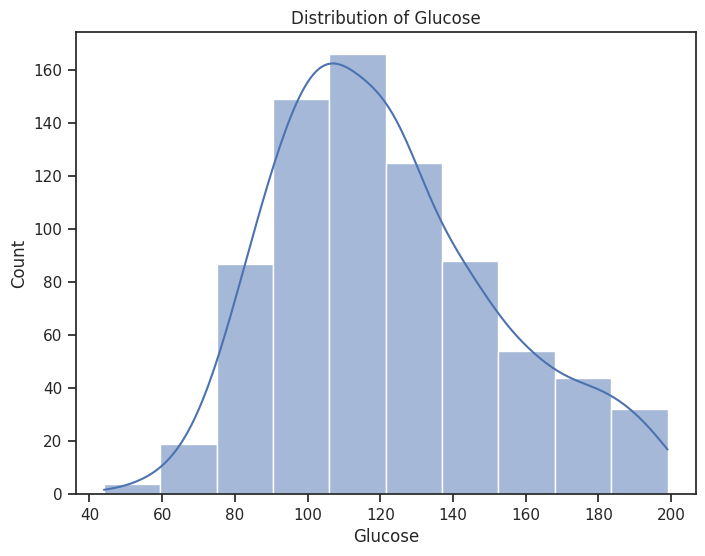

In [ ]:
sns.set(style="ticks")
plt.figure(figsize=(8, 6))
sns.histplot(data=df_clean, x='Glucose', bins=10, kde=True)
plt.title('Distribution of Glucose')
plt.xlabel('Glucose')
plt.ylabel('Count')
plt.show()


The distribution of glucose levels exhibits characteristics of being almost normally distributed. The majority of individuals fall within the range of 90 to 120, which represents the mode or peak of the distribution. It is worth noting that no individual in the dataset has a glucose level below 40 or above 200.

This information suggests that the data shows a relatively symmetrical distribution, with a concentration of values around the central range of 90 to 120. The absence of extremely low or high glucose levels further supports the notion of a more concentrated distribution.

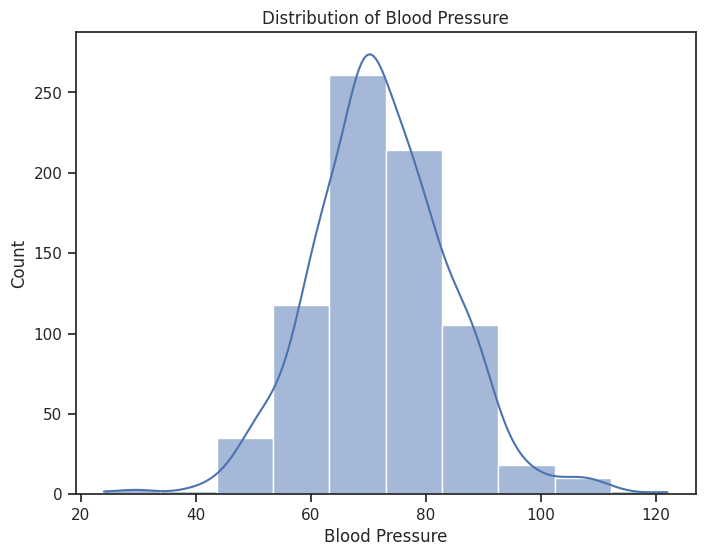

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df_clean, x='BloodPressure', bins=10, kde=True)
plt.title('Distribution of Blood Pressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Count')
plt.show()

The blood pressure distribution is approximately symmetrical. The mean and median of the distribution are approximately equal, indicating a lack of significant skewness.

More than half of the distribution falls within the range of 60 to 80, suggesting that a significant portion of individuals have blood pressure readings within this interval.

However, it is worth noting that there are extreme values recorded at both ends of the distribution, with the lowest recorded value being 24 and the highest recorded value being 200. These extreme values indicate the presence of outliers in the dataset, which are values that deviate significantly from the majority of observations.

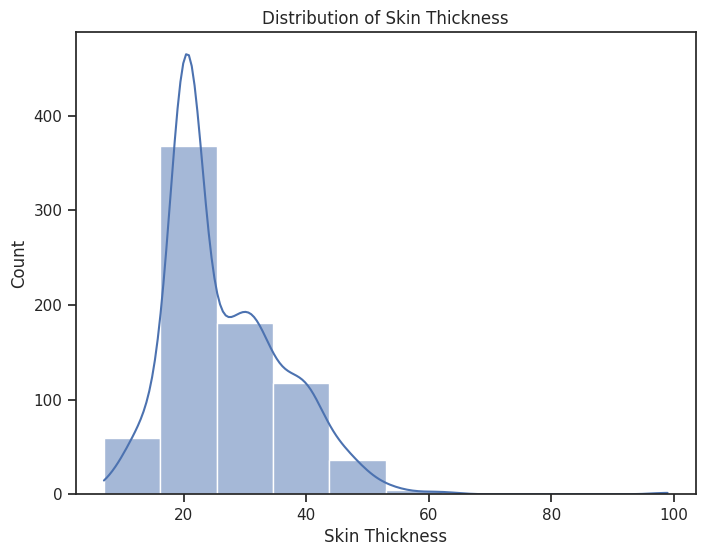

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df_clean, x='SkinThickness', bins=10, kde=True)
plt.title('Distribution of Skin Thickness')
plt.xlabel('Skin Thickness')
plt.ylabel('Count')
plt.show()

Thsi shows the distribution of skin thickness of individuals.
Despite the close proximity between the mean and median values, the distribution is not considered normally distributed. This highlights the importance of visualizing the data to gain a better understanding of its underlying characteristics.

The skin thickness distribution exhibits a slight positive skew. This suggests that there may be a small number of individuals with relatively thicker skin compared to the majority.

Furthermore, most of the skin thickness measurements fall within the lower range, specifically less than 30.



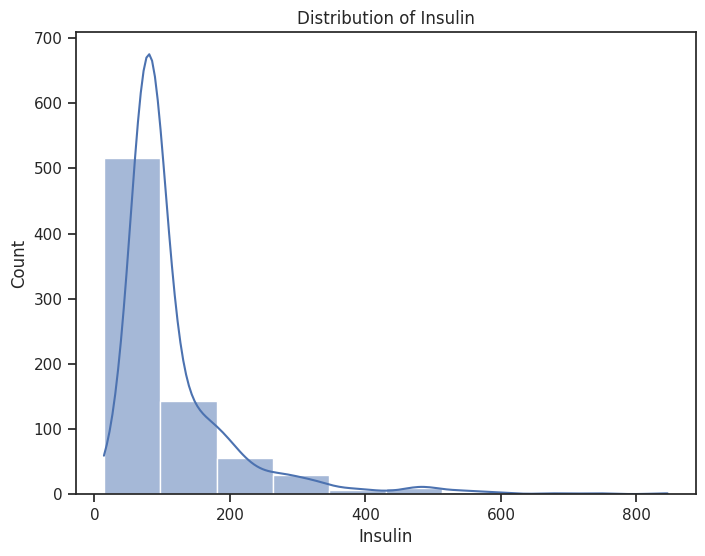

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df_clean, x='Insulin', bins=10, kde=True)
plt.title('Distribution of Insulin')
plt.xlabel('Insulin')
plt.ylabel('Count')
plt.show()

Majority of individuals have lower insulin levels, with a long tail extending towards higher values.

More than 80% of individuals have insulin levels below 200. This suggests that the majority of the dataset falls within this range, indicating a concentration of lower insulin values.

However, it is worth noting that there is a maximum value of 800 recorded, which implies the presence of  extreme values in the dataset.

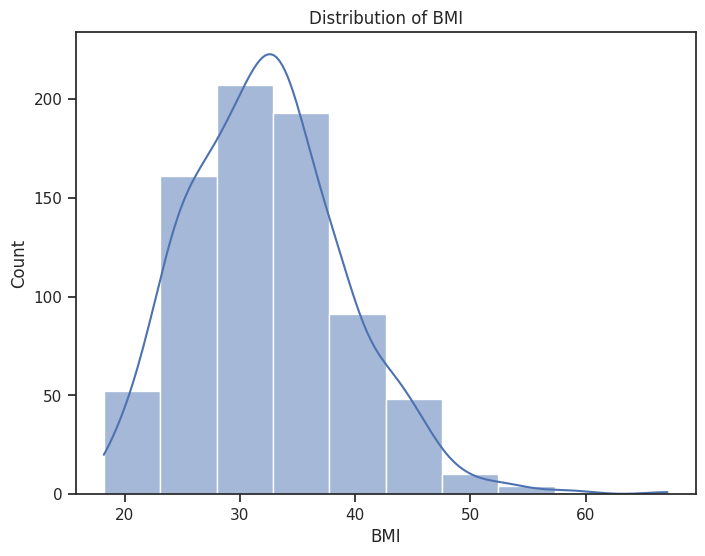

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df_clean, x='BMI', bins=10, kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

The distribution appears to be nearly normally distributed. More than 50% of individuals fall within the range of 30 to 40 for their BMI values. Additionally, there may be only a small number of individuals with
significantly high BMI values.

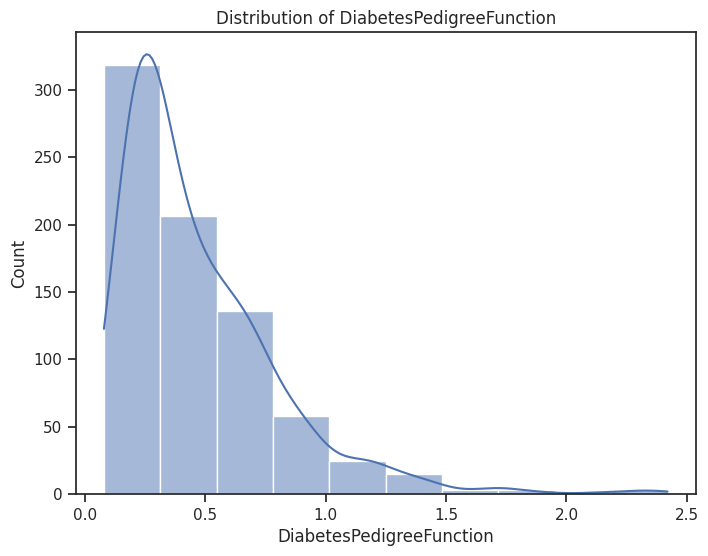

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df_clean, x='DiabetesPedigreeFunction', bins=10, kde=True)
plt.title('Distribution of DiabetesPedigreeFunction')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Count')
plt.show()

The pedigree function for pregnancy is highly right-skewed, indicating that the majority of individuals have lower values. There is a small number of people with pedigree function values between 1.5 and 2.5. Furthermore, the distribution is predominantly below 0.5.

In [ ]:
df_clean.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome',
       'Pregnancies_status', 'BMI_Categories', 'Age_Categories'],
      dtype='object')

In [ ]:
colors = ['#5AACC3','#F26331']
labels = ['Non-diabetic', 'Diabetic']

outcome_counts = df_clean['Outcome'].value_counts()
pregnancy_counts = df_clean['Pregnancies_status'].value_counts()
age_group_counts = df_clean['Age_Categories'].value_counts()
pregnancies_counts = df_clean['Pregnancies'].value_counts()

fig_outcome = go.Figure(data=go.Pie(labels=labels, values=outcome_counts.values, marker=dict(colors=colors)))
fig_outcome.update_layout(title='Distribution of Outcome', autosize=False, width=500, height=500)
fig_pregnancies = go.Figure(data=go.Pie(labels=labels, values=pregnancy_counts.values, marker=dict(colors=colors)))
fig_pregnancies.update_layout(title='Distribution of Pregnancy Status', autosize=False, width=500, height=500)
fig_outcome.show()
fig_pregnancies.show()

The pie chart illustrating the distribution of outcomes reveals that approximately 65% of individuals are non-diabetic, while the remaining 35% have been diagnosed with diabetes.

In terms of pregnancy status, the pie chart indicates that 85% of the population has experienced pregnancy at least once.

In [ ]:
colors = ['#5AACC3','#F26331', '#F3ECDB', '#7F886A']

fig_count_pregnancies = go.Figure(data=go.Bar(x=pregnancies_counts.index, y=pregnancies_counts.values))
fig_count_pregnancies.update_layout(title='Distribution of Pregnancies')
fig_age_groups = go.Figure(data=go.Pie(labels=age_group_counts.index, values=age_group_counts.values, marker=dict(colors=colors)))
fig_age_groups.update_layout(title='Distribution of Age Groups', autosize=False, width=500, height=500)
fig_count_pregnancies.show()
fig_age_groups.show()


The histogram representing the distribution of the number of pregnancies shows that roughly 50% of individuals have either not experienced pregnancy or have been pregnant no more than twice. The maximum number of pregnancies reported by an individual is 17.



The pie chart illustrates the distribution of age categories. Approximately three-quarters of the population falls under the age of 40. The group with the highest percentage is the adult category, representing 40% of the total population. On the other hand, the old age group, which includes individuals aged 60 years or older, has the lowest percentage at 3.5%.

## Boxplots

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(y=df_clean['Age'], name='Age'))
fig.update_layout(title='Boxplot of Age', xaxis_title='Age',yaxis_title='Value')
fig.show()

The boxplot of the age distribution reveals that the median age is 29, indicating that half of the individuals fall below this age and half are above it. The interquartile range (IQR), representing the middle 50% of the data, spans from 24 to 41. This indicates that the majority of individuals in the dataset are within this age range.

The minimum age is 21, suggesting that there are individuals as young as 21 in the dataset. On the other hand, the maximum age is 81, indicating that there are individuals as old as 81. This wide range of ages demonstrates the diversity of age groups in the dataset.

In [ ]:
fig = px.box(df_clean, y='BMI', title='Boxplot of BMI')
fig.update_layout( xaxis_title='BMI',yaxis_title='Value')
fig.show()

The median BMI is 32, which means that half of the individuals have a BMI below this value and half have a BMI above it. The interquartile range (IQR), representing the range of the middle 50% of the data, spans from 27.5 to 36.6. This indicates that the majority of individuals in the dataset have BMI values within this range.

The minimum BMI recorded is 18.2, indicating the presence of under-weight individuals. On the other hand, the maximum BMI is 67.1, suggesting the existence of individuals with significantly higher BMI values.

While there are a few data points above the upper fence, which amy be consider edoutliers, overall, the boxplot still shows central tendenc and  spread,thus providing valuable insights into the characteristics of the dataset.




## Variable combinations

In [ ]:
variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']
num_plots = len(variables)
num_rows = (num_plots + 1) // 2
num_cols = 2
fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=variables)
for i, var in enumerate(variables):
    row = i // num_cols + 1
    col = i % num_cols + 1
    scatter_trace = go.Scatter(x=df_clean['Age'], y=df_clean[var], mode='markers', name=var)
    fig.add_trace(scatter_trace, row=row, col=col)
fig.update_layout(title='Variable Distribution by Age',
                  height=2000,
                  showlegend=True)
fig.show()

The set of scattered plots shows the distribution of the various variables in the dataset according to age relations and outliers can also be identified:

1. 'Pregnancies' vs 'Age': This plot showcases the distribution of the number of pregnancies for different age groups. It helps to identify any trends or patterns between age and the number of pregnancies.

2. 'Glucose' vs 'Age': This plot represents the distribution of glucose levels across different age groups. It enables us to observe any correlations or patterns between age and glucose levels.

3. 'BloodPressure' vs 'Age': This plot displays the distribution of blood pressure readings for various age groups. It allows us to examine any relationships between age and blood pressure.

4. 'SkinThickness' vs 'Age': This plot visualizes the distribution of skin thickness measurements across different age groups. It helps us understand if there are any trends or variations in skin thickness based on age.

5. 'Insulin' vs 'Age': This plot illustrates the distribution of insulin levels for different age groups. It enables us to analyze any associations or patterns between age and insulin levels.

6. 'BMI' vs 'Age': This plot showcases the distribution of body mass index (BMI) values across various age groups. It allows us to examine how BMI varies with age.

7. 'DiabetesPedigreeFunction' vs 'Age': This plot represents the distribution of the diabetes pedigree function for different age groups. It enables us to observe any correlations or patterns between age and the diabetes pedigree function.

By examining these scatter plots, we can gain insights into how each variable relates to age and potentially identify any patterns or relationships that may exist within the dataset.

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'Age', 'DiabetesPedigreeFunction']
num_plots = len(variables)
num_rows = (num_plots + 1) // 2
num_cols = 2

fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=variables)

for i, var in enumerate(variables):
    row = i // num_cols + 1
    col = i % num_cols + 1
    scatter_trace = go.Scatter(x=df_clean['BMI'], y=df_clean[var], mode='markers', name=var)
    fig.add_trace(scatter_trace, row=row, col=col)

fig.update_layout(title='Variable Distribution by BMI', height=2000, showlegend=True)

fig.show()


The set of scatter plots visualizes the relationship between the variables 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'Age', and 'DiabetesPedigreeFunction' with respect to the 'BMI' variable. Each scatter plot represents the distribution of a specific variable based on BMI.

1. 'Pregnancies' vs 'BMI': This plot showcases the distribution of the number of pregnancies for different BMI ranges. It helps to identify any trends or patterns between BMI and the number of pregnancies.

2. 'Glucose' vs 'BMI': This plot represents the distribution of glucose levels across different BMI ranges. It enables us to observe any correlations or patterns between BMI and glucose levels.

3. 'BloodPressure' vs 'BMI': This plot displays the distribution of blood pressure readings for various BMI ranges. It allows us to examine any relationships between BMI and blood pressure.

4. 'SkinThickness' vs 'BMI': This plot visualizes the distribution of skin thickness measurements across different BMI ranges. It helps us understand if there are any trends or variations in skin thickness based on BMI.

5. 'Insulin' vs 'BMI': This plot illustrates the distribution of insulin levels for different BMI ranges. It enables us to analyze any associations or patterns between BMI and insulin levels.

6. 'Age' vs 'BMI': This plot showcases the distribution of ages for different BMI ranges. It allows us to examine how BMI varies with age.

7. 'DiabetesPedigreeFunction' vs 'BMI': This plot represents the distribution of the diabetes pedigree function for different BMI ranges. It enables us to observe any correlations or patterns between BMI and the diabetes pedigree function.

By examining these scatter plots, we can gain insights into how each variable relates to BMI and potentially identify any patterns or relationships that may exist within the dataset.

The

## Pairplot

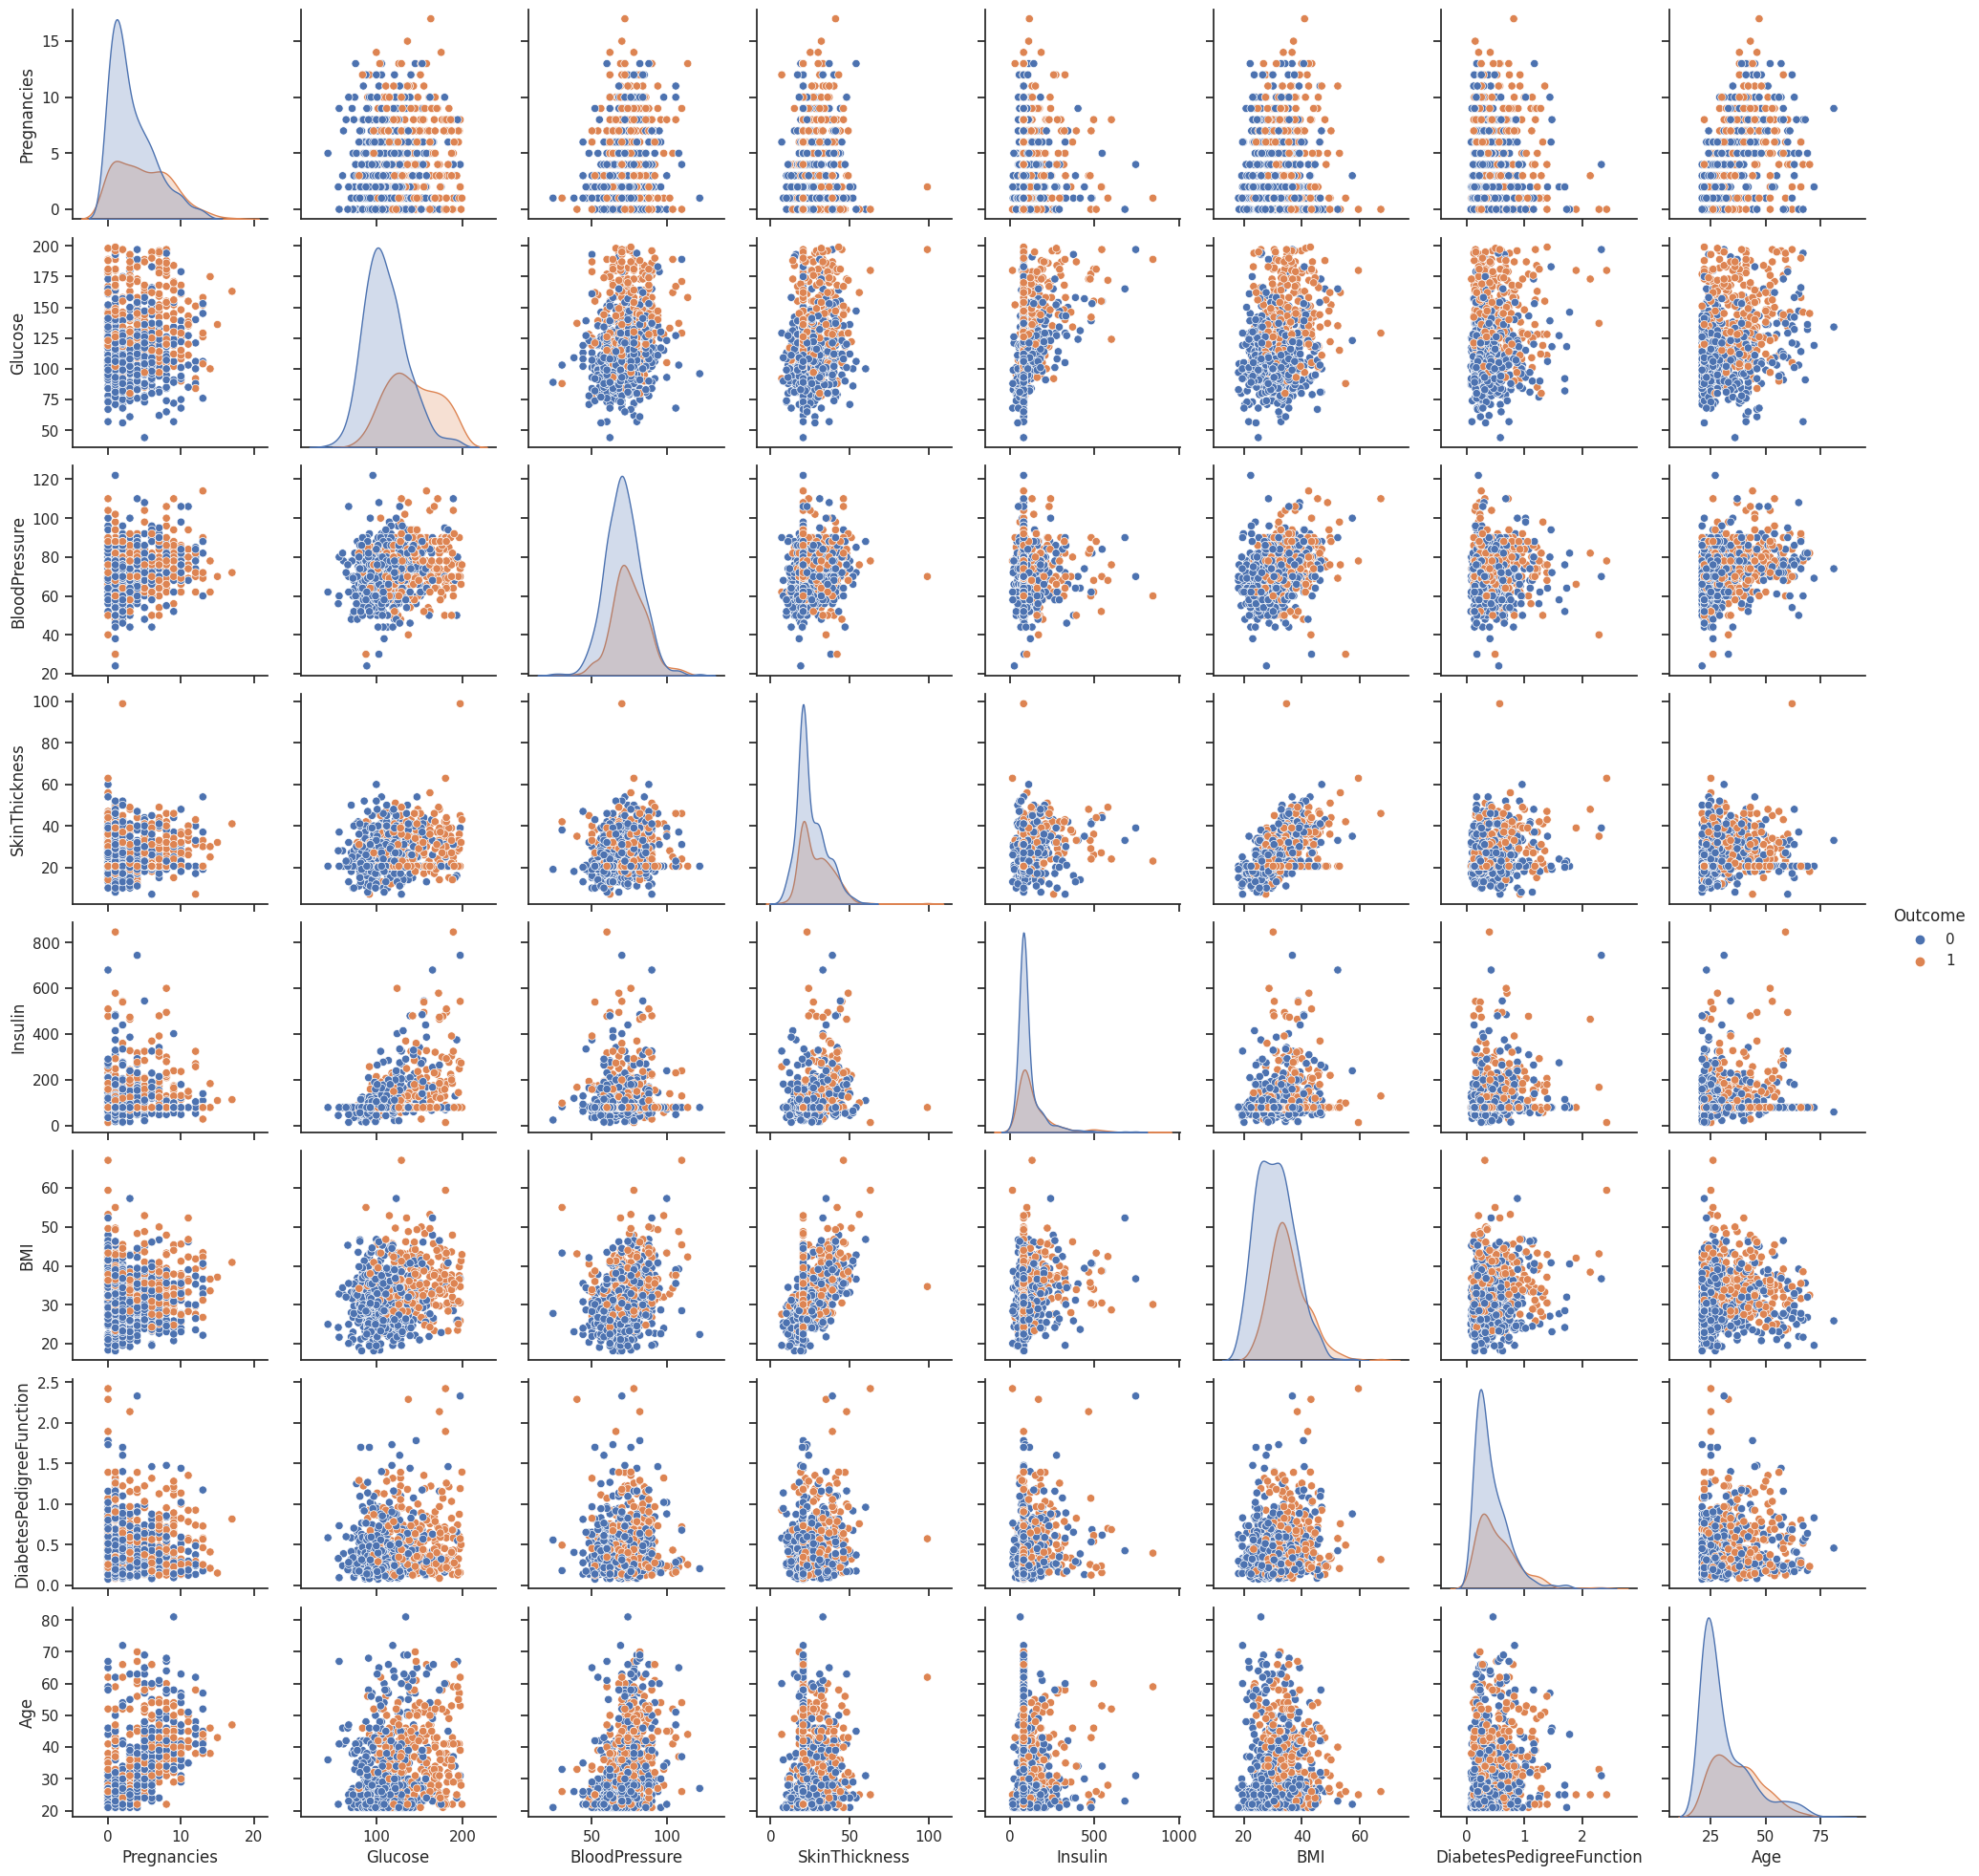

In [ ]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
sns.pairplot(df_clean[columns], hue='Outcome')
plt.show()

The pairplot consists of scatter plots for each combination of variables, where each point represents an individual data point. The scatter plots are hue to the 'Outcome' variable, which represents whether an individual is diabetic (1) or non-diabetic (0).

By examining the scatter plots, we can gain insights into the relationships and potential correlations between these variables. For example:

- 'Glucose' vs 'BMI': This plot shows the relationship between the blood glucose levels and body mass index. We can observe if there is any clustering or pattern between these two variables, and whether there is a difference in distribution for diabetic and non-diabetic individuals.

- 'Age' vs 'Insulin': This plot displays the relationship between age and insulin levels. It allows us to analyze if there are any trends or patterns in insulin levels as individuals age, and whether there is any difference between diabetics and non-diabetics.

- 'Pregnancies' vs 'DiabetesPedigreeFunction': This plot shows the relationship between the number of pregnancies and the diabetes pedigree function. It allows us to examine if there is any correlation between the two variables and whether the diabetes pedigree function differs for individuals with different pregnancy counts.

Overall, the pairplot provides a comprehensive overview of the relationships between the selected variables and their distributions in the dataset. It helps us identify potential correlations and patterns, and provides a visual representation of how the variables relate to each other in the context of diabetes prediction.

## Correlation

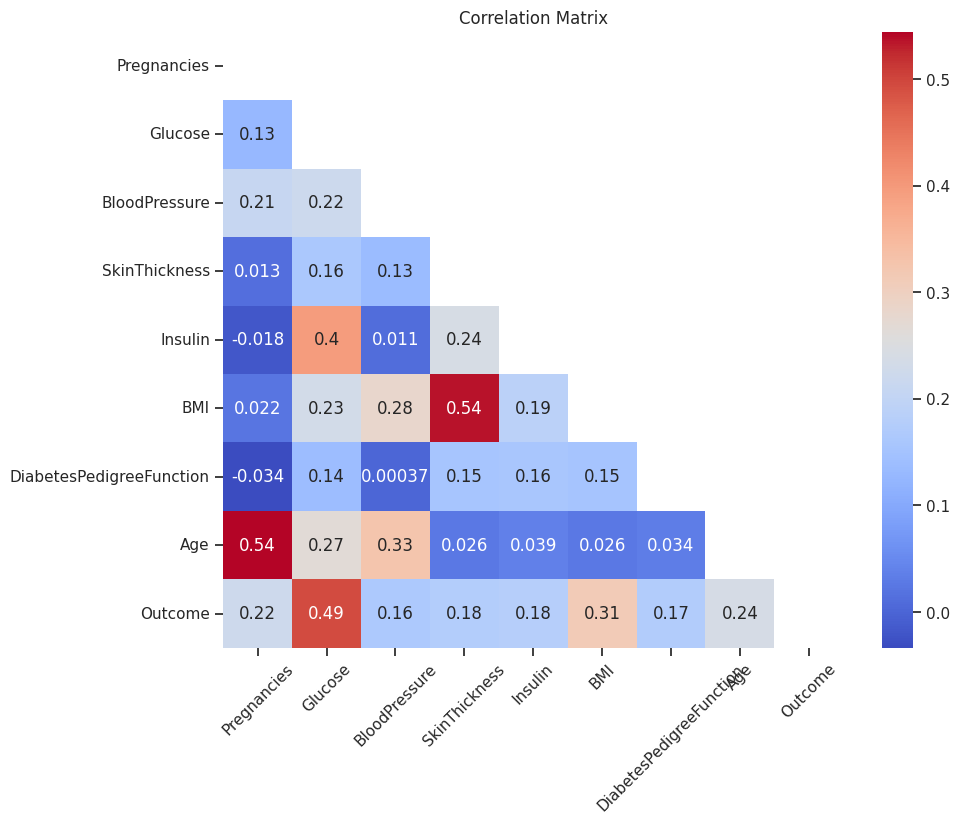

In [ ]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
correlation_matrix = df_clean[columns].corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask)
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.show()


The correlation matrix provides an overview of the relationships between different column headings. The maximum correlation coefficient observed is 0.54, which occurs between Age and Number of pregnancies. This correlation makes intuitive sense, as the number of pregnancies experienced by an individual may be influenced by their age.

Additionally, the correlation between BMI and skin thickness is notable, with a correlation coefficient of 0.54. This suggests a relationship between these two variables, indicating that individuals with higher BMI values may tend to have thicker skin.

Furthermore, the correlation coefficient of 0.4 between Insulin and Glucose indicates a moderate level of correlation between these variables. This suggests that there may be some association between insulin levels and glucose levels in the dataset.

## BMI and Age vs Outcome

In [ ]:
bmi_ranges = ['<18.5(Underweight)', '18.5-24.9(Healthy weight)', '25-29.9(Overweight)', '30+(Obesity)']
outcome_counts = [
    df_clean[df_clean['BMI'] < 18.5]['Outcome'].value_counts(),
    df_clean[(df_clean['BMI'] >= 18.5) & (df_clean['BMI'] < 25)]['Outcome'].value_counts(),
    df_clean[(df_clean['BMI'] >= 25) & (df_clean['BMI'] < 30)]['Outcome'].value_counts(),
    df_clean[df_clean['BMI'] >= 30]['Outcome'].value_counts()]

non_diabetic_counts = [count[0] if 0 in count else 0 for count in outcome_counts]
diabetic_counts = [count[1] if 1 in count else 0 for count in outcome_counts]

trace_non_diabetic = go.Bar(x=bmi_ranges,y=non_diabetic_counts,name='Non-diabetic',marker=dict(color='blue'))

trace_diabetic = go.Bar(x=bmi_ranges,y=diabetic_counts,name='Diabetic',marker=dict(color='orange'))
layout = go.Layout(title='Distribution of Outcome based on BMI',xaxis=dict(title='BMI Range'),
    yaxis=dict(title='Count'),barmode='stack')
fig = go.Figure(data=[trace_non_diabetic, trace_diabetic], layout=layout)
fig.show()

The bar plot illustrates the distribution of outcomes (diabetic and non-diabetic) based on body mass index (BMI) categories. The BMI categories include "Underweight" (<18.5), "Healthy weight" (18.5-24.9), "Overweight" (25-29.9), and "Obesity" (30+).

In the dataset, there are 4 individuals categorized as underweight, and none of them are diabetic. The healthy weight range consists of 95 non-diabetic individuals and a small count of 7 diabetic individuals.

For the overweight range, there are 139 non-diabetic individuals and 40 diabetic individuals. However, the highest count of diabetic patients is observed in the "Obesity" category (BMI 30+), with 221 individuals, along with the highest count of non-diabetic patients (262). It is noteworthy that individuals with a BMI of 30+ make up a significant proportion of the studied population.

These findings highlight the association between BMI categories and the prevalence of diabetes, with the highest risk observed in the obesity category.

In [ ]:
age_ranges = ['<25 (Young)', '25-39 (Adult)', '40-59 (Senior)', '60+ (Old)']

outcome_counts = [
    df_clean[df_clean['Age'] < 25]['Outcome'].value_counts(),
    df_clean[(df_clean['Age'] >= 25) & (df_clean['Age'] < 40)]['Outcome'].value_counts(),
    df_clean[(df_clean['Age'] >= 40) & (df_clean['Age'] < 60)]['Outcome'].value_counts(),
    df_clean[df_clean['Age'] >= 60]['Outcome'].value_counts()]

non_diabetic_counts = [count[0] if 0 in count else 0 for count in outcome_counts]

diabetic_counts = [count[1] if 1 in count else 0 for count in outcome_counts]

trace_non_diabetic = go.Bar(x=age_ranges, y=non_diabetic_counts, name='Non-diabetic', marker=dict(color='blue'))
trace_diabetic = go.Bar(x=age_ranges, y=diabetic_counts, name='Diabetic', marker=dict(color='orange'))

layout = go.Layout(
    title='Distribution of Outcome based on Age',
    xaxis=dict(title='Age Range'),
    yaxis=dict(title='Count'),
    barmode='stack')

fig = go.Figure(data=[trace_non_diabetic, trace_diabetic], layout=layout)
fig.show()



The bar plot represents the distribution of outcomes (diabetic and non-diabetic) based on different age ranges. The age ranges are categorized as "Young" (<25 years old), "Adult" (25-39 years old), "Senior" (40-59 years old), and "Old" (60+ years old).

In the dataset, the "Young" age range (less than 25 years old) has a total of 188 non-diabetic individuals and 31 diabetic individuals. This suggests that a larger proportion of individuals in this age range are non-diabetic.

The "Adult" age range (25-39 years old) shows a higher count of diabetics with 129 individuals, while 213 individuals in this age range are non-diabetic. This indicates that the prevalence of diabetes is relatively higher in the adult age group compared to the young age group.

Moving on to the "Senior" age range (40-59 years old), there are 99 individuals classified as diabetics and 76 individuals classified as non-diabetics. This suggests a relatively higher prevalence of diabetes in the senior age group compared to the non-diabetic population.

Finally, in the "Old" age range (60+ years old), there are 9 individuals classified as diabetics and 23 individuals classified as non-diabetics. This age range has a smaller sample size, indicating a lower prevalence of diabetes compared to the non-diabetic population.

Overall, the bar plot provides a visual representation of the distribution of outcomes across different age ranges. It allows us to observe the varying prevalence of diabetes among different age groups, with the highest count in the adult age range and relatively lower counts in the other age groups.

## Distributions of Variable Combinations



<Axes: xlabel='Outcome', ylabel='BMI'>

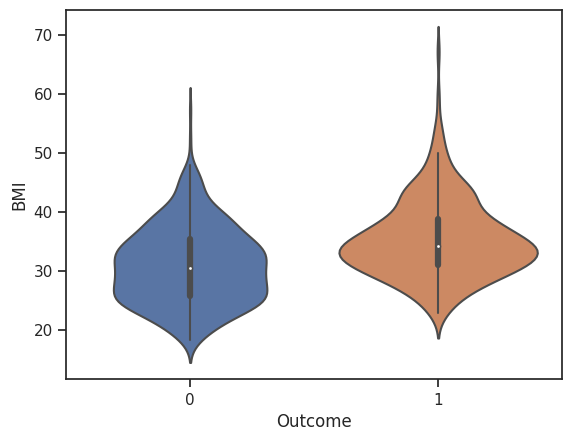

In [ ]:
sns.violinplot(x='Outcome', y='BMI', data = df_clean)

The violin plots effectively depict the differences between the BMI distributions of diabetic and non-diabetic individuals.

Median Comparison: The median of the diabetic group is visibly higher than the median of the non-diabetic group. This indicates that, on average, diabetic individuals tend to have higher BMI values in the variable being visualized

Whisker Comparison: The whiskers, representing the extent of the distribution, tend to be longer or wider in the diabetic group compared to the non-diabetic group. This suggests a greater range or variability in the variable among diabetic individuals.

Probability Density: The width or extension of the violin plot around the interquartile range (IQR) is indicative of the probability density. In the case of the diabetic group, the wider section around the IQR suggests a higher probability or concentration of individuals within that range.

In [ ]:
fig = go.Figure()

fig.add_trace(go.Box(
    x=df_clean['Outcome'],
    y=df_clean['BMI'],
    name='Box Plot',
    boxmean=True,
))

fig.update_layout(
    title='Box Plot',
    xaxis_title='Outcome',
    yaxis_title='BMI',
)

fig.show()

The box plot comparison of BMI between diabetic and non-diabetic individuals reveals interesting findings. In terms of the minimum BMI value, it is observed that non-diabetic individuals tend to have lower BMIs compared to their diabetic counterparts. On the other hand, when considering the maximum BMI value, it is typically higher among the diabetic group.

The distribution of BMI in both groups are approximately in equal proportions.

In [ ]:
fig = go.Figure()

fig.add_trace(go.Box(
    x=df_clean['Outcome'],
    y=df_clean['Age'],
    name='Box Plot',
    boxmean=True,
))

fig.update_layout(
    title='Box Plot',
    xaxis_title='Outcome',
    yaxis_title='Age',
)

fig.show()

From the box plot comparison of age between diabetic and non-diabetic individuals, several observations can be made:

1. Median Comparison: The median age of the non-diabetic group is below the first quartile (Q1) of the diabetic group. This indicates that, on average, non-diabetic individuals tend to be younger than those diagnosed with diabetes.

2. Median and Quartile Comparison: The median age of the diabetic group is higher than the third quartile (Q3) of the non-diabetic group. This implies that the middle value of the age distribution for diabetic individuals is greater than the upper boundary of the age distribution for non-diabetic individuals.

3. Mean and Median Comparison: The mean and median ages of the non-diabetic group are not closely aligned compared to the diabetic group. This suggests that the age distribution of non-diabetic individuals may have more pronounced outliers or a skewed distribution, resulting in a larger difference between the mean and median values.

4. Similar Interquartile Range (IQR): Both diabetic and non-diabetic groups exhibit a similar spread of ages, as indicated by the interquartile range (IQR). The IQR represents the range between the first quartile (Q1) and the third quartile (Q3), which signifies the central 50% of the data. Thus, while the median age values differ, the range of ages within the middle 50% of the two groups is comparable.

Based on these observations, we can infer that non-diabetic individuals, on average, tend to be younger than those diagnosed with diabetes. The higher median age in the diabetic group suggests that diabetes may be more prevalent or diagnosed at a later stage in life. The disparity between the mean and median ages in the non-diabetic group indicates a potential presence of outliers or a skewed distribution of age values. However, both groups have a similar spread of ages within their interquartile range (IQR).

BMI Distribution


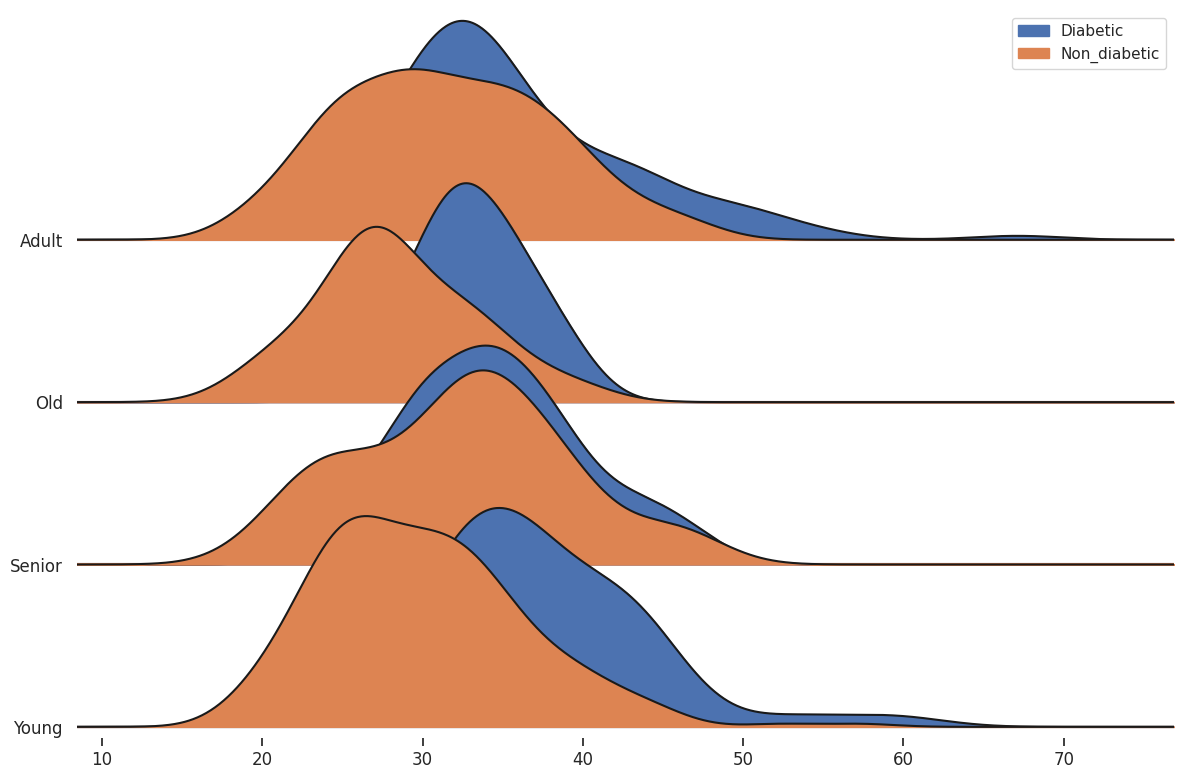

In [ ]:
dff = df_clean.copy()
print('BMI Distribution')

dff["Non_diabetic"] = dff.apply(lambda row: row["BMI"] if row["Outcome"] == 0 else np.nan, axis = 1)
dff["Diabetic"] = dff.apply(lambda row: row["BMI"] if row["Outcome"] ==  1 else np.nan, axis = 1)
fig, axes = joypy.joyplot(dff,
                         column=['Diabetic', 'Non_diabetic'],
                          by = "Age_Categories",
                          ylim = 'own',
                          figsize = (12,8),
                          legend = True
                         )


The plots depicting the distribution of BMI across different age categories consistently reveal a notable trend: non-diabetic individuals consistently exhibit lower BMI values compared to diabetic individuals across all age groups.

This observation suggests a consistent association between diabetes status and BMI, regardless of age. The plots clearly demonstrate that, within each age category, the BMI distribution for non-diabetic individuals tends to be shifted towards lower values, while the BMI distribution for diabetic individuals moves towards higher values.

In summary, the plots provide compelling evidence supporting the notion that non-diabetic individuals generally maintain lower BMI values compared to diabetic individuals, regardless of their age.

Age Distribution in BMI Categories


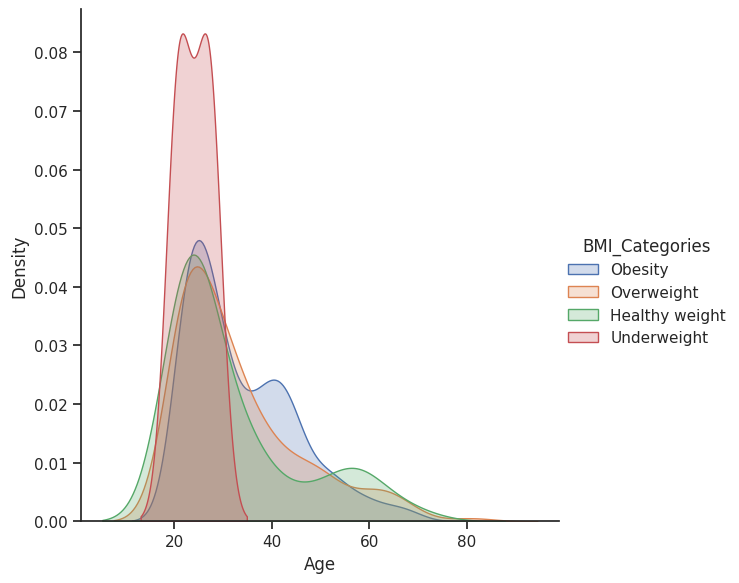

In [ ]:
print('Age Distribution in BMI Categories')
sns.FacetGrid(df_clean, hue="BMI_Categories", height=6,).map(sns.kdeplot, "Age",fill=True).add_legend()
plt.show()


The plot shows a Kernel Density Estimation (KDE) plot which is used to estimate and visualize the probability density function (PDF) of the "Age" variable within each BMI category.

Based on the KDE plot, the highest probability density is observed for individuals between the ages of 12 and 35 in the underweight BMI category. This suggests that within this age range, there is a higher likelihood of individuals being classified as underweight compared to other BMI categories.

On the other hand, for the categories of obese, overweight, and healthy weight, the KDE plot indicates that the likelihood or probability of individuals falling into these BMI categories remains relatively consistent across the age spectrum. This suggests that the distribution of ages within these BMI categories is similar, without any notable concentration or deviation across different age groups.

# Dealing with Outliers - Winsorization

Performing outlier winsorization as described here: https://www.statology.org/


In [ ]:
def replace_outliers(df, target_col):
    q1 = np.percentile(df[target_col], 25)
    q3 = np.percentile(df[target_col], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df.loc[(df[target_col] < lower_bound), target_col] = lower_bound
    df.loc[(df[target_col] > upper_bound), target_col] = upper_bound
    return df

In [ ]:
df_clean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_status
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958,0.855469
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951,0.351857
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000,1.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000,1.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,1.000000


In [ ]:
df_clean = replace_outliers(df_clean, 'Glucose')
df_clean = replace_outliers(df_clean, 'BloodPressure')
df_clean = replace_outliers(df_clean, 'SkinThickness')
df_clean = replace_outliers(df_clean, 'Insulin')
df_clean = replace_outliers(df_clean, 'BMI')
df_clean = replace_outliers(df_clean, 'DiabetesPedigreeFunction')
df_clean = replace_outliers(df_clean, 'Age')

In [ ]:
df_clean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_status
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.226161,26.475416,103.895703,32.388956,0.458914,33.199870,0.348958,0.855469
std,3.369578,30.436016,11.716722,9.112201,46.779152,6.667633,0.285596,11.628404,0.476951,0.351857
min,0.000000,44.000000,40.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000,1.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000,1.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,1.000000
max,17.000000,199.000000,104.000000,49.195312,198.425781,50.250000,1.200000,66.500000,1.000000,1.000000


# Statistical Analysis

## Crosstabs

In [ ]:
pd.crosstab(df_clean['Pregnancies_status'], df_clean['Outcome'])

Outcome,0,1
Pregnancies_status,,
0,73,38
1,427,230


In [ ]:
pd.crosstab(df_clean['BMI_Categories'], df_clean['Outcome'])

Outcome,0,1
BMI_Categories,,
Healthy weight,101,7
Obesity,259,217
Overweight,136,44
Underweight,4,0


In [ ]:
pd.crosstab(df_clean['Age_Categories'], df_clean['Outcome'])

Outcome,0,1
Age_Categories,,
Adult,186,121
Old,20,7
Senior,72,95
Young,222,45


In [ ]:
pd.crosstab(df_clean['Age_Categories'], df_clean['BMI_Categories'])
# In all age categories, Obesity is the highest amount

BMI_Categories,Healthy weight,Obesity,Overweight,Underweight
Age_Categories,,,,
Adult,35,198,72,2
Old,4,12,11,0
Senior,18,121,28,0
Young,51,145,69,2


In [ ]:
pd.crosstab(df_clean['BMI_Categories'], df_clean['Pregnancies_status'])
# women who experienced pregnancy have higher value in all BMI categories,

Pregnancies_status,0,1
BMI_Categories,,
Healthy weight,14,94
Obesity,82,394
Overweight,14,166
Underweight,1,3


## Hypotheses Testing

In [ ]:
df_clean.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome',
       'Pregnancies_status', 'BMI_Categories', 'Age_Categories'],
      dtype='object')

In [ ]:
df_clean['Glucose'].mean()

121.68160502115886

### variables & types

Catgorical: Pregnancy, pregnancies_status, BMI_Categories, Age_Categories, Outcome

Numerical: Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age

### Hypotheses formulations:

#### 1. Do women with Obesity have more diabetic disease than other BMI categories?

  H0: All BMI categories have the same rate of diabetic desease. (no significant difference between BMI categories)
  
  H1: women with Obesity have more diabetic disease than other BMI categories.

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
df_clean.groupby(['BMI_Categories'])['Outcome'].mean()

BMI_Categories
Healthy weight    0.064815
Obesity           0.455882
Overweight        0.244444
Underweight       0.000000
Name: Outcome, dtype: float64

In [ ]:
# Separate the Outcome based on BMI categories
Outcome_Obes = df_clean[df_clean['BMI_Categories'] == 'Obesity']['Outcome']
Outcome_non_Obes = df_clean[df_clean['BMI_Categories'] != 'Obesity']['Outcome']

# Perform independent t-test assuming equal variances
t_stat, p_value = ttest_ind(Outcome_Obes, Outcome_non_Obes, equal_var=True)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 8.27365036384083
P-value: 5.744014066793815e-16


P-value << 0.05, therefore there is a significant difference between the mean of the two groups. So, we can reject the null hypothesis.

### Hypotheses formulations:

#### 2. Do adult women have more diabetic disease than other age categories?

  H0: All age categories have the same rate of diabetic desease. (no significant difference between age categories)
  
  H1: Senior women have more diabetic disease than other age categories.

In [ ]:
df_clean.groupby(['Age_Categories'])['Outcome'].mean()

Age_Categories
Adult     0.394137
Old       0.259259
Senior    0.568862
Young     0.168539
Name: Outcome, dtype: float64

In [ ]:
# Separate the Outcome based on Age categories
Outcome_sen = df_clean[df_clean['Age_Categories'] == 'Senior']['Outcome']
Outcome_non_sen = df_clean[df_clean['Age_Categories'] != 'Senior']['Outcome']

# Perform independent t-test assuming equal variances
t_stat, p_value = ttest_ind(Outcome_sen, Outcome_non_sen, equal_var=True)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 6.93930715964305
P-value: 8.3976539258819e-12


P-value << 0.05, therefore there is a significant difference between the mean of the two groups. So, we can reject the null hypothesis.

### Hypotheses formulations:

#### 3. Do women who became pregnant have more diabetic disease?

  H0: All women have the same rate of diabetic desease. (no significant difference between pregnancy categories)
  
  H1: women who became pregnant have more diabetic disease.

In [ ]:
df_clean.groupby(['Pregnancies_status'])['Outcome'].mean()

Pregnancies_status
0    0.342342
1    0.350076
Name: Outcome, dtype: float64

In [ ]:
# Separate the Outcome based on Pregnancy status
Outcome_preg = df_clean[df_clean['Pregnancies_status'] == 1]['Outcome']
Outcome_non_preg = df_clean[df_clean['Pregnancies_status'] == 0]['Outcome']

# Perform independent t-test assuming equal variances
t_stat, p_value = ttest_ind(Outcome_preg, Outcome_non_preg, equal_var=True)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 0.1579079458093947
P-value: 0.8745709531992204


P-value > 0.05, therefore there is not a significant difference between the mean of the two groups. So, we cannot reject the null hypothesis.

### Hypotheses formulations:

#### 4. Do women with Insulin > 103.9 (above mean) have more diabetic disease?

  H0: All women have the same rate of diabetic desease. (no significant difference between Insulin rate above mean and Insulin rate below mean in women)
  
  H1: women with Insulin > 103.9 have more diabetic disease.

In [ ]:
df_clean['insulin_above_mean'] = df['Insulin'] > 103.9
df_clean.groupby(['insulin_above_mean'])['Outcome'].mean()

insulin_above_mean
False    0.299048
True     0.456790
Name: Outcome, dtype: float64

In [ ]:
# Separate the Outcome based on Insulin above mean status
Outcome_ins_high = df_clean[df_clean['insulin_above_mean'] == 1]['Outcome']
Outcome_ins_low = df_clean[df_clean['insulin_above_mean'] == 0]['Outcome']

# Perform independent t-test assuming equal variances
t_stat, p_value = ttest_ind(Outcome_ins_high, Outcome_ins_low, equal_var=True)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 4.311213735285645
P-value: 1.8355957564685093e-05


P-value << 0.05, therefore there is a significant difference between the mean of the two groups. So, we can reject the null hypothesis.

> Indented block



### Hypotheses formulations:

#### 5. Do women with Glucose > 121.7 (above mean) have more diabetic disease?

  H0: All women have the same rate of diabetic disease. (no significant difference between Glucose rate above mean and Glucose rate below mean in women)
  
  H1: women with Glucose above mean have more diabetic disease.

In [ ]:
df_clean['glucose_above_mean'] = df['Glucose'] > 121.7
df_clean.groupby(['glucose_above_mean'])['Outcome'].mean()

glucose_above_mean
False    0.176471
True     0.562682
Name: Outcome, dtype: float64

In [ ]:
# Separate the Outcome based on Glucose above mean status
Outcome_gluc_high = df_clean[df_clean['glucose_above_mean'] == 1]['Outcome']
Outcome_gluc_low = df_clean[df_clean['glucose_above_mean'] == 0]['Outcome']

# Perform independent t-test assuming equal variances
t_stat, p_value = ttest_ind(Outcome_gluc_high, Outcome_gluc_low, equal_var=True)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 12.180803047211858
P-value: 2.5190982116321853e-31


P-value << 0.05, therefore there is a significant difference between the mean of the two groups. So, we can reject the null hypothesis.

### Hypotheses formulations:

#### 6. Do women with Glucose > 121.7 and Insulin > 103.9 have more diabetic disease?

  H0: All women have the same rate of diabetic desease. (no significant difference between different Glucose and Insulin of women)
  
  H1: women with Glucose > 121.7 and Insulin > 103.9 have more diabetic disease.

In [ ]:
df_clean.groupby((df_clean['Glucose'] > 121.7) & (df_clean['Insulin'] > 103.9))['Outcome'].mean()

False    0.290216
True     0.563636
Name: Outcome, dtype: float64

In [ ]:
# Separate the Outcome based on Glucose status
Outcome_glucose_insulin = df_clean[(df_clean['Glucose'] > 121.7) & (df_clean['Insulin'] > 103.9)]['Outcome']
Outcome_other = df_clean[(df_clean['Glucose'] <= 121.7) | (df_clean['Insulin'] <= 103.9)]['Outcome']

# Perform independent t-test assuming equal variances
t_stat, p_value = ttest_ind(Outcome_glucose_insulin, Outcome_other, equal_var=True)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 6.709576305277134
P-value: 3.795057331417883e-11


P-value << 0.05, therefore there is a significant difference between the mean of the two groups. So, we can reject the null hypothesis.

# KNN Classification

In [ ]:
x = pd.DataFrame (df_clean , columns = ['Glucose' , 'BloodPressure' , 'SkinThickness' , 'Insulin' , 'BMI' ,
                                        'DiabetesPedigreeFunction' , 'Age']).values
y = df_clean.Outcome.values.reshape (-1,1)
x

array([[148.        ,  72.        ,  35.        , ...,  33.6       ,
          0.627     ,  50.        ],
       [ 85.        ,  66.        ,  29.        , ...,  26.6       ,
          0.351     ,  31.        ],
       [183.        ,  64.        ,  20.53645833, ...,  23.3       ,
          0.672     ,  32.        ],
       ...,
       [121.        ,  72.        ,  23.        , ...,  26.2       ,
          0.245     ,  30.        ],
       [126.        ,  60.        ,  20.53645833, ...,  30.1       ,
          0.349     ,  47.        ],
       [ 93.        ,  70.        ,  31.        , ...,  30.4       ,
          0.315     ,  23.        ]])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

x_train , x_test , y_train , y_test = train_test_split (x , y , test_size = 0.3 , random_state = 0)

In [ ]:
k = 5  # KNN = 5 ---> it means, choose 5 sample and train model by this 5 sample.

knn = KNeighborsClassifier(n_neighbors = k)

knn.fit(x_train , y_train.ravel())

y_pred = knn.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

## Confusion Matrix of KNN


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[130  27]
 [ 37  37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.80       157
           1       0.58      0.50      0.54        74

    accuracy                           0.72       231
   macro avg       0.68      0.66      0.67       231
weighted avg       0.71      0.72      0.72       231



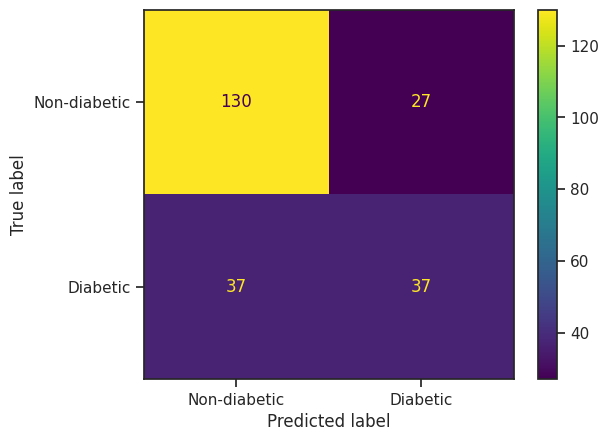

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Non-diabetic', 'Diabetic'])
disp = disp.plot(ax=ax)

In [ ]:
print(f"number of observations N = {len(y_test)}")
print(f'positives P = {np.sum(y_test)}')
print(f'true positives TP = {conf_matrix[1,1]}')
TP = conf_matrix[1,1]
print(f'true negatives TN = {conf_matrix[0,0]}')
print(f'false positives FP = {conf_matrix[0,1]}')
FP = conf_matrix[0,1]
print(f'false negatives FN = {conf_matrix[1,0]}')
FN = conf_matrix[1,0]

sensitivity = TP / (TP + FN)
print(f'sensitivity = recall = true positive rate TPR = {sensitivity}')
precision = TP / (TP + FP)
print(f'precision = {precision}')
f_score = 2*((precision * sensitivity) / (precision + sensitivity))
print(f'F-score = {f_score}')

number of observations N = 231
positives P = 74
true positives TP = 37
true negatives TN = 130
false positives FP = 27
false negatives FN = 37
sensitivity = recall = true positive rate TPR = 0.5
precision = 0.578125
F-score = 0.5362318840579711


In [ ]:
conf_matrix_knn = conf_matrix

model_metrics = pd.DataFrame(columns =['sensitivity', 'precision', 'f_score'])
model_metrics = model_metrics.append(pd.Series([sensitivity, precision, f_score], index=model_metrics.columns, name='knn'))
model_metrics

<ipython-input-75-ded0f4b3401b>:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,sensitivity,precision,f_score
knn,0.5,0.578125,0.536232


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier # or Decision Tree Regressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
dt = DecisionTreeClassifier(max_depth = 3)
dt = dt.fit(x_train , y_train)
y_pred = dt.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn import tree
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_0 <= 144.50
|   |--- feature_6 <= 28.50
|   |   |--- feature_4 <= 30.45
|   |   |   |--- class: 0
|   |   |--- feature_4 >  30.45
|   |   |   |--- class: 0
|   |--- feature_6 >  28.50
|   |   |--- feature_4 <= 26.35
|   |   |   |--- class: 0
|   |   |--- feature_4 >  26.35
|   |   |   |--- class: 0
|--- feature_0 >  144.50
|   |--- feature_4 <= 29.95
|   |   |--- feature_3 <= 117.50
|   |   |   |--- class: 0
|   |   |--- feature_3 >  117.50
|   |   |   |--- class: 1
|   |--- feature_4 >  29.95
|   |   |--- feature_0 <= 157.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  157.50
|   |   |   |--- class: 1



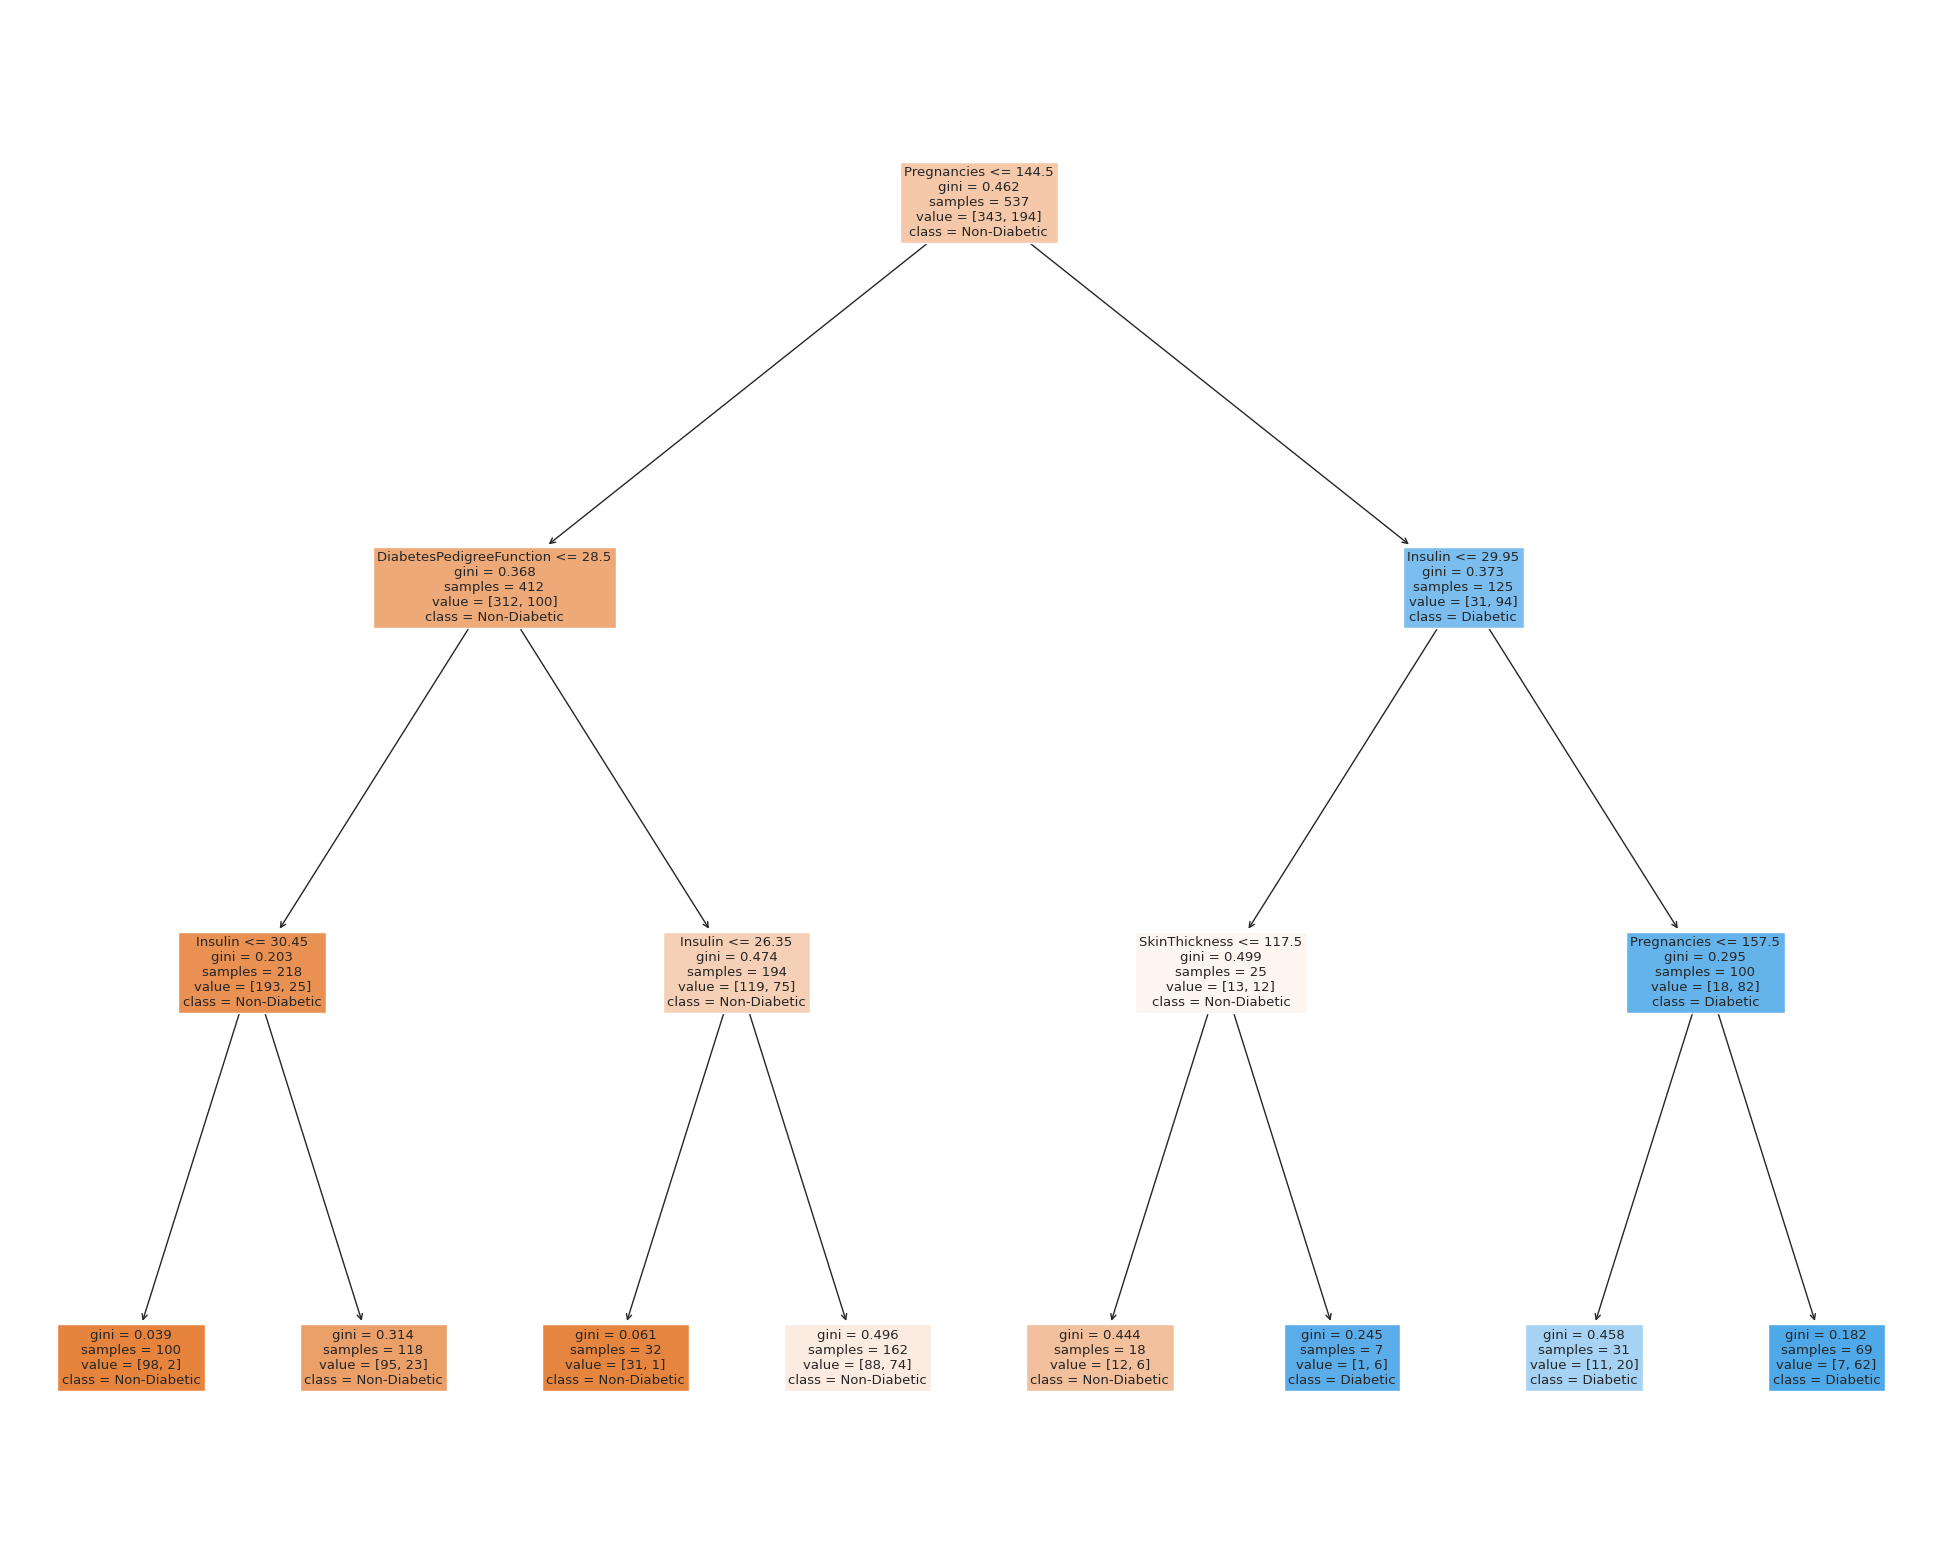

In [ ]:
feature_names = ['Pregnancies', 'Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age']
target_names = ['Non-Diabetic', 'Diabetic']
fig = plt.figure(figsize = (25 , 20))
plot = tree.plot_tree(dt,
                     feature_names = feature_names,
                     class_names = target_names,
                     filled = True)

## Confusion matrix of Decission Tree


In [ ]:
conf_matrix2 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix2)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[144  13]
 [ 50  24]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.92      0.82       157
           1       0.65      0.32      0.43        74

    accuracy                           0.73       231
   macro avg       0.70      0.62      0.63       231
weighted avg       0.71      0.73      0.70       231



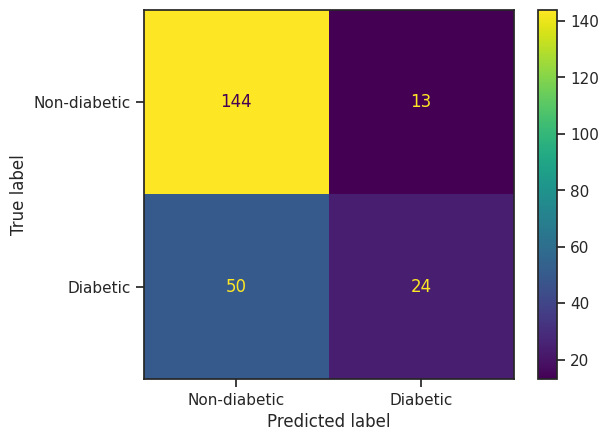

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1)
#fig.set_facecolor('#383838')
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix2, display_labels=['Non-diabetic', 'Diabetic'])
disp = disp.plot(ax=ax)

In [ ]:
print(f"number of observations N = {len(y_test)}")
print(f'positives P = {np.sum(y_test)}')
print(f'true positives TP = {conf_matrix2[1,1]}')
TP = conf_matrix2[1,1]
print(f'true negatives TN = {conf_matrix2[0,0]}')
print(f'false positives FP = {conf_matrix2[0,1]}')
FP = conf_matrix2[0,1]
print(f'false negatives FN = {conf_matrix2[1,0]}')
FN = conf_matrix2[1,0]

sensitivity = TP / (TP + FN)
print(f'sensitivity = recall = true positive rate TPR = {sensitivity}')
precision = TP / (TP + FP)
print(f'precision = {precision}')
f_score = 2*((precision * sensitivity) / (precision + sensitivity))
print(f'F-score = {f_score}')

number of observations N = 231
positives P = 74
true positives TP = 24
true negatives TN = 144
false positives FP = 13
false negatives FN = 50
sensitivity = recall = true positive rate TPR = 0.32432432432432434
precision = 0.6486486486486487
F-score = 0.43243243243243246


In [ ]:
conf_matrix_dt = conf_matrix2

model_metrics = model_metrics.append(pd.Series([sensitivity, precision, f_score], index=model_metrics.columns, name='decision_tree'))
model_metrics

<ipython-input-83-40f34fda45c3>:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,sensitivity,precision,f_score
knn,0.500000,0.578125,0.536232
decision_tree,0.324324,0.648649,0.432432


# Regression Analysis

In [ ]:
from sklearn.model_selection import train_test_split

feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction', 'Age']
X = df_clean[feature_cols] # Features
y = df_clean.Outcome # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16)

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=16)
logreg.fit(X_scaled_train, y_train)
y_pred = logreg.predict(X_scaled_test)

In [ ]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[134,  13],
       [ 35,  49]])

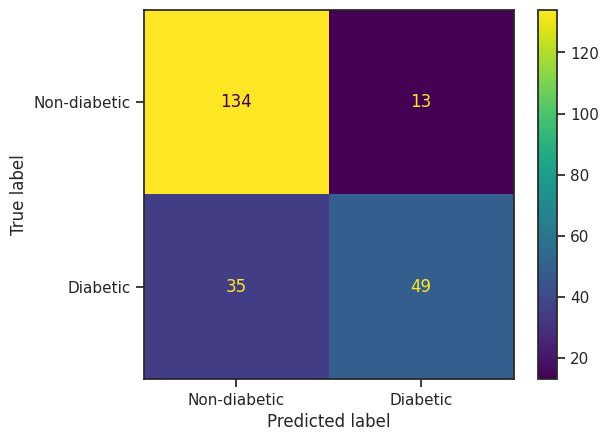

In [ ]:
#@title
fig, ax = plt.subplots(nrows=1, ncols=1)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=['Non-diabetic', 'Diabetic'])
disp = disp.plot(ax=ax)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.79      0.91      0.85       147
   with diabetes       0.79      0.58      0.67        84

        accuracy                           0.79       231
       macro avg       0.79      0.75      0.76       231
    weighted avg       0.79      0.79      0.78       231



In [ ]:
print(f"number of observations N = {len(y_test)}")
print(f'positives P = {np.sum(y_test)}')
print(f'true positives TP = {cnf_matrix[1,1]}')
TP = cnf_matrix[1,1]
print(f'true negatives TN = {cnf_matrix[0,0]}')
print(f'false positives FP = {cnf_matrix[0,1]}')
FP = cnf_matrix[0,1]
print(f'false negatives FN = {cnf_matrix[1,0]}')
FN = cnf_matrix[1,0]

sensitivity = TP / (TP + FN)
print(f'sensitivity = recall = true positive rate TPR = {sensitivity}')
precision = TP / (TP + FP)
print(f'precision = {precision}')
f_score = 2*((precision * sensitivity) / (precision + sensitivity))
print(f'F-score = {f_score}')

number of observations N = 231
positives P = 84
true positives TP = 49
true negatives TN = 134
false positives FP = 13
false negatives FN = 35
sensitivity = recall = true positive rate TPR = 0.5833333333333334
precision = 0.7903225806451613
F-score = 0.6712328767123289


In [ ]:
conf_matrix_logreg = cnf_matrix

model_metrics = model_metrics.append(pd.Series([sensitivity, precision, f_score], index=model_metrics.columns, name='logistic_regression'))
model_metrics

<ipython-input-91-d85775a4b0b1>:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,sensitivity,precision,f_score
knn,0.500000,0.578125,0.536232
decision_tree,0.324324,0.648649,0.432432
logistic_regression,0.583333,0.790323,0.671233


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



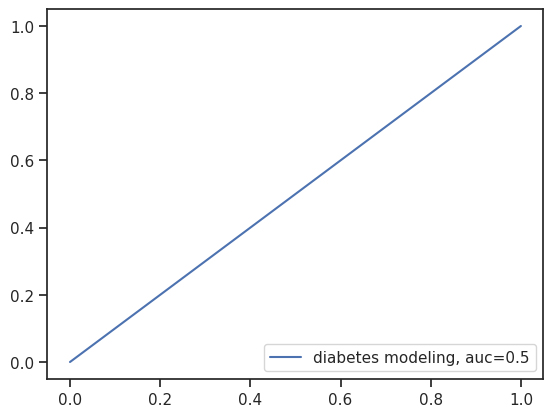

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="diabetes modeling, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# Select best features predicting diabetic status
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression, f_regression

sel = SelectKBest(score_func = f_regression, k=4).fit(X_train, y_train)
x_new = sel.transform(X_train)

In [ ]:
print(x_new[:5])

[[103.          33.         192.          24.        ]
 [166.          20.53645833  79.79947917  26.6       ]
 [106.          20.53645833  79.79947917  31.2       ]
 [148.          27.         198.42578125  30.9       ]
 [121.          20.53645833  79.79947917  36.        ]]


In [ ]:
# Three key features: Glucose, SkinThickness, BMI
X_train[:5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
35,4,103.0,60.0,33.000000,192.000000,24.0,0.966,33.0
495,6,166.0,74.0,20.536458,79.799479,26.6,0.304,66.0
250,9,106.0,52.0,20.536458,79.799479,31.2,0.380,42.0
199,4,148.0,60.0,27.000000,198.425781,30.9,0.150,29.0
678,3,121.0,52.0,20.536458,79.799479,36.0,0.127,25.0


# Comparing Prediction Models

In [ ]:
# metrics for each model
model_metrics

,sensitivity,precision,f_score
knn,0.500000,0.578125,0.536232
decision_tree,0.324324,0.648649,0.432432
logistic_regression,0.583333,0.790323,0.671233


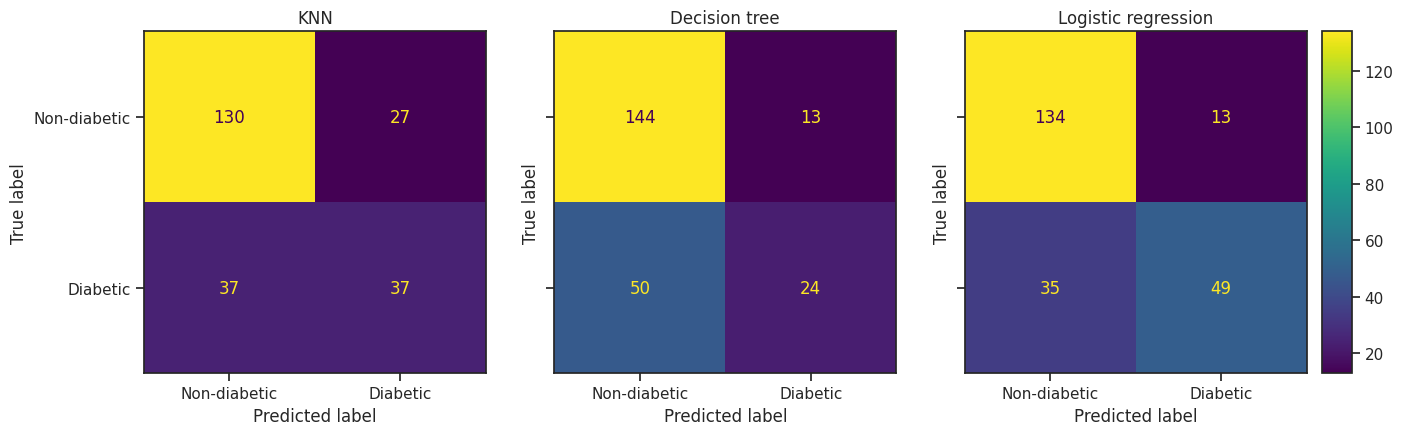

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharex = True, sharey=True, figsize = (15, 8))
disp = ConfusionMatrixDisplay(confusion_matrix= conf_matrix_knn, display_labels=['Non-diabetic', 'Diabetic'])
disp = disp.plot(ax=ax[0],colorbar=False)
ax[0].set_title("KNN")
disp = ConfusionMatrixDisplay(confusion_matrix= conf_matrix_dt, display_labels=['Non-diabetic', 'Diabetic'])
disp = disp.plot(ax=ax[1], colorbar=False)
ax[1].set_title("Decision tree")
disp = ConfusionMatrixDisplay(confusion_matrix= conf_matrix_logreg, display_labels=['Non-diabetic', 'Diabetic'])
disp = disp.plot(ax=ax[2], colorbar = False)
ax[2].set_title("Logistic regression")

cax = fig.add_axes([ax[2].get_position().x1+0.01,ax[2].get_position().y0,0.02,ax[2].get_position().height])

plt.colorbar(disp.im_,  cax=cax)

Based on the results of comparing the models, logistic regression has better sensitivity, precision and f-score, and it should be chosen as the preferred model for predicting diabetic condition on similar data.

Precision metric displays the correctness of the positive prediction. Precision rate of the best model is 0.79, which can be considered quite a good rate. Sensitivity (also referred to as recall) displays how many of the true positives are correctly identified; for the best model it is 0.58. This value is not as high as precision, which means that some of the true positives might be labeled as negative.

For medical models high recall is preferred, so the model might be extended with other features in the future to improve recall. Finally, f-score represents a weighted average of precision and sensitivity, and is 0.67 for the logistic regression model.

